In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

In [8]:
# load market data from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

gspc_df = pd.read_csv('data_nifty_2010-2021.csv',index_col = 0)
gspc_df['trading_date'] = pd.to_datetime(gspc_df['trading_date'])

cut_off_date = '2010-01-01' 
gspc_df = gspc_df[gspc_df['trading_date'] >= cut_off_date]


gspc_df.head()

,trading_date,open,high,low,close,volume,turnover,index_name,timestamp
0,2010-01-04,5200.90,5238.45,5167.10,5232.20,148652424,6.531610e+10,nifty,2022-02-05 12:28:42
1,2010-01-05,5277.15,5288.35,5242.40,5277.90,240844424,7.969620e+10,nifty,2022-02-05 12:28:42
2,2010-01-06,5278.15,5310.85,5260.05,5281.80,216147837,7.892600e+10,nifty,2022-02-05 12:28:42
3,2010-01-07,5281.80,5302.55,5244.75,5263.10,181246734,6.890990e+10,nifty,2022-02-05 12:28:42
4,2010-01-08,5264.25,5276.75,5234.70,5244.75,201910800,7.777040e+10,nifty,2022-02-05 12:28:42


In [10]:
# take random sets of sequential rows 
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(gspc_df)-row_quant)
    market_subset = gspc_df.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['trading_date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['close'].pct_change()
    High_Gap = market_subset['high'].pct_change()
    Low_Gap = market_subset['low'].pct_change() 
    Volume_Gap = market_subset['volume'].pct_change() 
    Daily_Change = (market_subset['close'] - market_subset['open']) / market_subset['open']
    Outcome_Next_Day_Direction = (market_subset['volume'].shift(-1) - market_subset['volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                                 
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))


0
2021-04-20 00:00:00
2000
2021-03-02 00:00:00
4000
2017-12-06 00:00:00
6000
2013-03-13 00:00:00
8000
2019-10-18 00:00:00
10000
2017-06-19 00:00:00
12000
2021-02-25 00:00:00
14000
2011-05-12 00:00:00
16000
2010-12-21 00:00:00
18000
2018-07-23 00:00:00
20000
2015-06-30 00:00:00
22000
2010-05-05 00:00:00
24000
2013-07-11 00:00:00
26000
2011-07-11 00:00:00
28000
2021-11-18 00:00:00
30000
2011-09-20 00:00:00
32000
2019-11-06 00:00:00
34000
2017-07-25 00:00:00
36000
2010-02-23 00:00:00
38000
2013-12-23 00:00:00
40000
2011-06-27 00:00:00
42000
2018-04-03 00:00:00
44000
2017-06-20 00:00:00
46000
2014-10-09 00:00:00
48000
2012-08-08 00:00:00
50000
2021-07-02 00:00:00
52000
2020-01-15 00:00:00
54000
2018-12-19 00:00:00
56000
2016-11-21 00:00:00
58000
2013-07-17 00:00:00
60000
2015-01-12 00:00:00
62000
2013-09-19 00:00:00
64000
2012-04-17 00:00:00
66000
2021-08-16 00:00:00
68000
2015-02-26 00:00:00
70000
2010-04-28 00:00:00
72000
2013-04-02 00:00:00
74000
2019-11-25 00:00:00
76000
2011-10-14 00:

In [11]:
len(market_subset)

28

In [31]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1999869, 8)
(1799869, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1610,99999,2016-07-25,-0.021988,-0.022316,-0.031905,0.931372,0.007411,-139340930.0
1611,99999,2016-07-25,0.000754,0.002463,0.014167,-0.454170,0.006885,8261565.0
1612,99999,2016-07-25,0.004095,0.003165,0.005908,0.049334,0.003928,-24224560.0
1613,99999,2016-07-25,0.009369,0.008108,0.008755,-0.137856,0.003781,136532219.0
1614,99999,2016-07-25,0.010208,0.011659,0.010352,0.901204,0.003329,-117450054.0
1615,99999,2016-07-25,0.004899,0.005850,0.008074,-0.407767,0.001840,-11626058.0
1616,99999,2016-07-25,0.005085,0.004990,0.006746,-0.068155,-0.000722,-15701886.0
1617,99999,2016-07-25,-0.004151,-0.002024,-0.005350,-0.098781,-0.005173,17073378.0
1618,99999,2016-07-25,0.000234,-0.002327,-0.000270,0.119183,-0.000491,-18167380.0
1619,99999,2016-07-25,-0.001763,-0.001034,-0.003625,-0.113314,-0.003210,12239998.0


In [32]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

In [33]:
new_set_df.tail(100)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
2121,99995,2018-08-17,L,L,L,136167.0,LLL
2122,99995,2018-08-17,H,M,H,15394879.0,HMH
2123,99995,2018-08-17,M,M,L,-10446060.0,MML
2124,99995,2018-08-17,M,M,L,-28912286.0,MML
2125,99995,2018-08-17,H,L,H,43008972.0,HLH
...,...,...,...,...,...,...,...
1625,99999,2016-07-25,L,L,L,3650353.0,LLL
1626,99999,2016-07-25,M,M,M,-7701425.0,MMM
1627,99999,2016-07-25,H,M,H,-10773695.0,HMH
1628,99999,2016-07-25,L,M,L,-6956043.0,LML


In [34]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2021-04-20,"{LML, MML, LHL, LHL, HHH, MLM, HMH, LML, LHL, ..."
1,1,2021-09-03,"{LLL, LHH, MLL, HMH, MMM, MMM, MLH, HHH, HHH, ..."
2,2,2012-07-19,"{LLL, MLM, MHM, MHM, HHH, MLM, MMM, MHM, HLH, ..."
3,3,2013-06-05,"{HLH, HHM, HMH, LLL, HLH, HHH, HLM, LLL, HMH, ..."
4,4,2010-03-11,"{LHL, LML, MLM, MLH, MHM, MHM, HHH, HLH, HLH, ..."


In [35]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,3.908146e+04
std,28867.657797,8.547976e+06
min,0.000000,-1.157412e+08
25%,24999.750000,-2.620598e+06
50%,49999.500000,1.303186e+04
75%,74999.250000,2.632820e+06
max,99999.000000,1.247660e+08


In [36]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2021-04-20,"{LML, MML, LHL, LHL, HHH, MLM, HMH, LML, LHL, ...",-4.682022e+05
1,1,2021-09-03,"{LLL, LHH, MLL, HMH, MMM, MMM, MLH, HHH, HHH, ...",8.706339e+05
2,2,2012-07-19,"{LLL, MLM, MHM, MHM, HHH, MLM, MMM, MHM, HLH, ...",-7.629849e+05
3,3,2013-06-05,"{HLH, HHM, HMH, LLL, HLH, HHH, HLM, LLL, HMH, ...",-3.206967e+05
4,4,2010-03-11,"{LHL, LML, MLM, MLH, MHM, MHM, HHH, HLH, HLH, ...",-2.701085e+06


In [37]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2021-04-20,"LML,MML,LHL,LHL,HHH,MLM,HMH,LML,LHL,HLM,HHH,LL...",-4.682022e+05
1,1,2021-09-03,"LLL,LHH,MLL,HMH,MMM,MMM,MLH,HHH,HHH,LLL,HLH",8.706339e+05
2,2,2012-07-19,"LLL,MLM,MHM,MHM,HHH,MLM,MMM,MHM,HLH,MMM,LLM,HH...",-7.629849e+05
3,3,2013-06-05,"HLH,HHM,HMH,LLL,HLH,HHH,HLM,LLL,HMH,MLH,LHL,MH...",-3.206967e+05
4,4,2010-03-11,"LHL,LML,MLM,MLH,MHM,MHM,HHH,HLH,HLH,MMM,MMM,HL...",-2.701085e+06


In [38]:
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(1239, 4)

In [39]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(98761, 4)

In [40]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [41]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [42]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 1000000])

98761


76068

In [43]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 1000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))  

all moves: 98761
big moves only: 76068


In [44]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
4,4,"LHL,LML,MLM,MLH,MHM,MHM,HHH,HLH,HLH,MMM,MMM,HL...",0
5,5,"HMH,MMM,LHH,HLH,LHL,HHH,MLM,MLH,LHL,LML,MHL,ML...",1
6,6,"HLH,LLL,LHL,HLH,HML,MML,LLL,HHH,HLH,LMM,HLM,HH...",0
7,7,"HHM,LHL,HLH,LLM,HMH,HMM,HLH,HHH,MLM,LML,LML,HH...",0
9,9,"MHH,MLM,HLM,MHM,MMM,LMM,MLL,HHH,LLL,LML,MLM",0


In [45]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(38411, 2)
(37657, 2)


In [49]:
compressed_set_neg.head()

,Sequence_ID,Event_Pattern
4,4,"LHL,LML,MLM,MLH,MHM,MHM,HHH,HLH,HLH,MMM,MMM,HL..."
6,6,"HLH,LLL,LHL,HLH,HML,MML,LLL,HHH,HLH,LMM,HLM,HH..."
7,7,"HHM,LHL,HLH,LLM,HMH,HMM,HLH,HHH,MLM,LML,LML,HH..."
9,9,"MHH,MLM,HLM,MHM,MMM,LMM,MLL,HHH,LLL,LML,MLM"
10,10,"LHL,MLH,HLH,MHM,MHM,HLM,HMH,MHM,HHM,MMM,LLL,HM..."


In [46]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [50]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
#     del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)
 

In [51]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns)

C:\Users\DELL\AppData\Local\Temp/ipykernel_30832/2460623140.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str


In [ ]:
grid_pos.index.name = None
grid_neg.index.name = None

In [60]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.042817,0.027170,0.068087,0.142488,0.255305,0.204310,0.083057,0.079609,0.149875,0.170918,...,0.065431,0.037527,0.003829,0.051505,0.148739,0.048215,0.118290,0.152826,0.147095,0.089735
HHL,0.000000,0.000000,0.000000,0.004224,0.000000,0.005859,0.011405,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011051,0.000000,0.000000,0.000000
HHM,0.009661,0.000000,0.009073,0.026148,0.000000,0.000000,0.040165,0.000000,0.024836,0.022789,...,0.000000,0.043344,0.037265,0.005425,0.031575,0.000000,0.015402,0.030937,0.000000,0.015112
HLH,0.112398,0.289538,0.167804,0.039588,0.272026,0.025657,0.079529,0.245112,0.101375,0.146769,...,0.124630,0.083381,0.161016,0.154928,0.086450,0.071531,0.052137,0.149415,0.137206,0.141574
HLL,0.000000,0.000000,0.010072,0.001889,0.000000,0.000000,0.011252,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.017932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.101697,0.193706,0.081897,0.130818,0.244206,0.155801,0.106628,0.204562,0.103521,0.061234,...,0.043943,0.038179,0.043898,0.073787,0.142371,0.036685,0.136827,0.132183,0.167838,0.108757
HHL,0.000000,0.000000,0.000000,0.003821,0.000000,0.033673,0.007962,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007580,0.000000,0.000000,0.000000
HHM,0.019424,0.000000,0.019812,0.026401,0.000000,0.000000,0.051873,0.000000,0.014575,0.062845,...,0.000000,0.004341,0.008682,0.006765,0.050795,0.000000,0.018879,0.057270,0.000000,0.020848
HLH,0.081063,0.123711,0.131428,0.041469,0.036179,0.004882,0.070384,0.094797,0.140639,0.073435,...,0.140339,0.060218,0.173446,0.116632,0.051057,0.071381,0.056183,0.059635,0.131619,0.061173
HLL,0.000000,0.000000,0.022232,0.003886,0.000000,0.000000,0.005357,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.032680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 1
1.0085483977773924
0.8172298433679424
outcome: 0
0.9478070493442781
-0.18673541217489925
outcome: 0
1.0044499719041327
0.6164841282637992
outcome: 0
0.9296031468927152
-2.106240626531889
outcome: 0
1.0003958745977344
0.5362189701329667
outcome: 0
0.9844785588371486
0.37168181811189355
outcome: 0
0.9296031468927152
-2.106240626531889
outcome: 0
0.9582515918120086
-0.6418438311848322
outcome: 0
1.0186694229514182
0.3496366326772742
outcome: 1
1.0038883518399704
0.5154728451416299
outcome: 0
0.9664282782863467
-1.774391526787145
outcome: 0
0.9551526130524881
-1.1176354986980916
outcome: 0
0.9800291250421762
-0.4873644779051233
outcome: 0
0.9959033429645469
0.5946385083767339
outcome: 0
0.9935797733692816
-1.4079075156472283
outcome: 0
0.9991764410071199
0.6466848186127171
outcome: 1
1.0375127707437886
1.3109648056356455
outcome: 0
0.9930721512884152
0.07062520462598204
outcome: 0
0.957713539667949
-3.438950117350464
outcome: 1
1.0220700058041254
0.3136962569720137
outcome: 0
0.

outcome: 1
0.9852113006498228
0.5845273199565275
outcome: 0
0.8667222889550118
-0.819279804555265
outcome: 1
1.0015403595940877
0.06911349639956213
outcome: 0
0.980728833449751
-2.7520233913119645
outcome: 1
0.9064134842647777
-1.4600595054938124
outcome: 0
0.9433166985608553
-3.4102978537280264
outcome: 0
1.0038521719402607
0.5219317410369011
outcome: 1
0.9596794085011809
0.25788463266103606
outcome: 0
0.9790004830687217
-0.2569933058228937
outcome: 0
1.0028077113812297
0.46011094562775423
outcome: 0
0.9817742853512462
-0.25053440992762255
outcome: 0
0.9623099963175514
-0.3111011746597723
outcome: 0
0.9643301774949448
-3.200285002001204
outcome: 1
0.9875643779857288
0.41072775354172864
outcome: 0
0.9609677128904011
-3.790080525517891
outcome: 1
1.0746922766196814
1.4367254956582323
outcome: 0
1.0039221584627103
0.009578920697873625
outcome: 1
0.9862120574399088
0.5972628072869915
outcome: 0
0.9789525273317388
0.316251934052016
outcome: 0
0.9624426962455362
-0.3524750694264031
outcome:

outcome: 0
1.0329321937184814
1.2800661220261687
outcome: 0
0.9375414360635528
-4.704492144446117
outcome: 0
0.9927590549843792
-3.3475174169404673
outcome: 0
1.0560204696460966
0.5158725952396723
outcome: 0
0.9960562402695079
0.5590575971426541
outcome: 0
0.9747694600616453
-3.24956103845999
outcome: 0
0.9551526130524881
-1.1176354986980916
outcome: 1
0.9798240020335568
0.058252684115325304
outcome: 0
1.0692267687961192
1.1237633391671864
outcome: 1
1.0082899719377598
0.8502558051351699
outcome: 0
1.005578063222589
0.5594260513073264
outcome: 0
0.9754730518485025
-0.027694757232878984
outcome: 0
0.920678047727715
-4.5669108287885125
outcome: 0
0.9327284709275657
-2.320709045316772
outcome: 1
0.9626444427383087
-1.3041705524433547
outcome: 1
0.9818710310645349
0.12971688030675307
outcome: 0
0.9746917449993282
-0.09874087972684861
outcome: 0
0.9127764289869643
-0.5131948654896279
outcome: 0
0.8853154307984037
-0.7992660732721382
outcome: 0
1.0052628983897194
0.08095090791830731
outcome:

outcome: 1
1.0550613937074333
0.9577929742045411
outcome: 0
1.02693967767271
1.1168280316559371
outcome: 1
0.9984931032139872
0.48843239251667203
outcome: 1
1.050235347393374
0.6294689101062725
outcome: 0
0.9901396741054614
-0.4096598389301798
outcome: 1
0.9897527130631222
0.016323099849342746
outcome: 1
1.0117467596784901
0.8306346335266346
outcome: 0
0.9550860612475457
-3.5244024758458115
outcome: 1
1.0375127707437886
1.3109648056356455
outcome: 1
1.0250859483182584
0.9673649139703631
outcome: 0
0.9463073928852578
-1.8287549074457339
outcome: 0
0.9954043918260326
0.46475477394153897
outcome: 1
0.9849907512436334
0.5689801796377737
outcome: 0
0.9289947236990261
-4.252029600380352
outcome: 0
0.9924266630927749
-0.11590984911928101
outcome: 0
1.0044504108246404
0.530728030379424
outcome: 0
0.9716357385081914
-3.0189711343104424
outcome: 0
0.9829939305500471
0.31844576971015137
outcome: 0
0.9793280569205753
-0.8680457769437111
outcome: 0
1.004939121833757
-0.20850598906814782
outcome: 0


outcome: 0
0.9520528931361645
-1.8036502773394705
outcome: 1
0.9890362202669415
-0.47472375290171076
outcome: 0
0.9711179807205265
-0.11399606496464265
outcome: 1
0.9899210253015759
0.44206234682060913
outcome: 1
0.9350789608799884
-0.27034633929888996
outcome: 1
0.9956044746012804
-0.12502327758014628
outcome: 1
1.0746922766196814
1.4367254956582323
outcome: 1
0.9064134842647777
-1.4600595054938124
outcome: 0
0.9926077335704456
0.42895931856026387
outcome: 0
0.9591718083350977
-2.0839688346554306
outcome: 1
1.0349025348918852
1.3039865949330478
outcome: 1
0.9829939305500471
0.31844576971015137
outcome: 0
0.9341791047730849
-2.8061256324658084
outcome: 1
0.9064134842647777
-1.4600595054938124
outcome: 0
0.9227172348550818
-0.2990443602267925
outcome: 0
0.9606172518922088
-2.0506991644015096
outcome: 0
1.0560204696460966
0.5158725952396723
outcome: 0
1.0184794706793507
0.259408701211935
outcome: 0
0.9135196085875407
-0.8995402900892155
outcome: 0
0.9847359553132448
0.1958987835326164
ou

outcome: 0
1.016016479040261
0.15588895305045763
outcome: 0
0.9313665195267752
-4.907978115772868
outcome: 0
0.94076040874631
-4.117608922759197
outcome: 1
0.976274614607108
0.5248323756595141
outcome: 0
0.9724568772388402
-1.1881245845599502
outcome: 0
0.9213941345884592
-3.485698631324
outcome: 0
0.957713539667949
-3.438950117350464
outcome: 0
0.8779048409305843
-0.9916852654987476
outcome: 0
0.9407707686996186
-3.1746030843472623
outcome: 0
0.9015604258140743
-1.0565981470771835
outcome: 0
0.9601680731345847
-1.7928145317404733
outcome: 1
0.952710765990769
0.12339389936578862
outcome: 0
0.9817826539482257
0.3280662818559666
outcome: 0
1.0668749290984307
1.467342588503249
outcome: 0
1.0116536100111784
0.21696481504636475
outcome: 1
1.0090538792727053
0.8590520944776927
outcome: 1
0.9621591921117465
-1.2758879247941368
outcome: 0
0.9607191784514002
-0.32419244177718526
outcome: 0
1.016016479040261
0.15588895305045763
outcome: 0
0.9800291250421762
-0.4873644779051233
outcome: 1
1.05023

outcome: 0
0.9711179807205265
-0.11399606496464265
outcome: 0
0.9551187339045165
-0.9409116943681458
outcome: 0
1.0204604419024434
0.8037648818877021
outcome: 0
0.9753636100923264
0.1269608447971144
outcome: 0
0.9670643338244271
-3.09140156593792
outcome: 0
0.9876007927758079
0.29086954643645035
outcome: 0
0.9960562402695079
0.5590575971426541
outcome: 0
0.9393040120987357
-0.04021527223517116
outcome: 0
1.0128248585049204
0.9202773678404367
outcome: 1
0.9875643779857288
0.41072775354172864
outcome: 0
0.939527498983315
-4.3371457461807035
outcome: 1
0.9082040293355687
-1.6044027466551378
outcome: 1
0.9963617241213006
0.21747694971137488
outcome: 0
0.9188177164330777
-3.742651267358001
outcome: 0
1.0116536100111784
0.21696481504636475
outcome: 0
0.9758932346107304
-0.10753716906937148
outcome: 0
0.9671678726592983
-1.6119461974709752
outcome: 0
0.9395793676048493
-0.13053081247062764
outcome: 0
0.9729101904202305
-0.5072539683426088
outcome: 0
0.9954864615005219
0.36047419056962593
outc

array([[617, 316],
       [102, 204]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 66.26 %


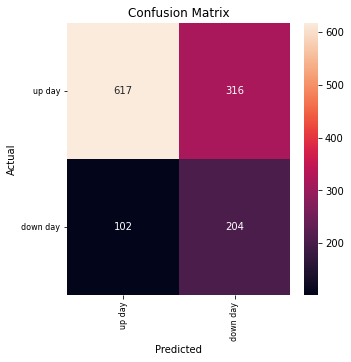

In [64]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()